In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import Parallel, delayed
import glob
import os
import pathlib

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from textwrap import wrap
from matplotlib.patches import Patch
global colour
colour = "black"
COLOR = colour
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
#mycol = ["red", "darkorange", "yellow", "limegreen", "dodgerblue", "darkviolet", "deeppink" ]
mycol = ["red", "green", "blue"]

import warnings
warnings.filterwarnings("ignore")

import colorsys
from PIL import ImageColor

In [2]:
def plot(df, parameter):
    gridspec = dict(wspace=0.0, width_ratios=[1,6])
    fig, ax = plt.subplots(ncols = 2, sharey=True, gridspec_kw = gridspec, figsize=(7,5))

    properties = dict(color=colour)
    sns.boxplot(data=df[df["day"]==0], x='day', y=parameter, ax=ax[0], palette=mycol, boxprops={"edgecolor":colour, "facecolor": "None"}, whiskerprops = properties, capprops = properties, medianprops = properties)
    sns.swarmplot(data=df[df["day"]==0], x='day', y=parameter, ax=ax[0], palette=mycol, size=3)

    sns.boxplot(data=df[df["day"]!=0], x='day', y=parameter, hue="condition",ax=ax[1], palette=mycol[1:], boxprops={"edgecolor":colour, "facecolor": "None"},  whiskerprops = properties, capprops = properties, medianprops = properties, hue_order=["soft", "stiff"], dodge=True)
    sns.swarmplot(data=df[df["day"]!=0], x='day', y=parameter, hue="condition", ax=ax[1], palette=mycol[1:], dodge=True, size=3) 

    handles, labels = [(a + b) for a, b in zip(ax[1].get_legend_handles_labels(), ax[0].get_legend_handles_labels())]
    print(handles, labels)
    good_indicies = [2,3]
    for a in ax:
        #a.get_legend().remove()
        a.set_ylabel (a.yaxis.get_label().get_text().replace("_", " "), fontsize=14)
        a.xaxis.label.set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[1].yaxis.set_visible(False)
    #ax[0].set_ylabel(r"Nuclear Volume $\mu$m$^3$")
    #ax[1].legend(loc='best', bbox_to_anchor=(1,0.5), framealpha=0)
    ax[1].legend([handles[index] for index in good_indicies], [labels[index] for index in good_indicies], framealpha=0)

    fig.text(0.45, 0.04, 'Day', va='center', ha='center', fontsize=14)
    #plt.savefig("{}_{}.png".format( parameter, colour), bbox_inches="tight", transparent =True)


In [3]:
root= "C:\\Users\\isobe\\Dropbox (The University of Manchester)\\Python\\Soft_Stiff_Experiment\\Shape_and_size_of_acini\\inividual_outputs\\using"
# cwd = os.getcwd()
# root = cwd + "\\individual_outputs"
print(root)
csv_paths = list(pathlib.Path(root).glob("*.csv"))
print(len(csv_paths))
data = []
for i in range(len(csv_paths)):
    data.append(pd.read_csv(csv_paths[i]))
all_data = pd.concat(data)

C:\Users\isobe\Dropbox (The University of Manchester)\Python\Soft_Stiff_Experiment\Shape_and_size_of_acini\inividual_outputs\using
5


In [5]:
all_data.to_csv("all_acinus_volumes_01_05.csv")

In [6]:
all_data = pd.read_csv("all_acinus_volumes_01_05.csv")

In [5]:
all_data.columns

Index(['Unnamed: 0', 'index', 'Vol_um', 'Roundness', 'filename', 'flag',
       'well', 'day', 'condition', 'image_type'],
      dtype='object')

In [13]:
all_data.head()

,Unnamed: 0.1,Unnamed: 0,index,Vol_um,Roundness,filename,flag,well,day,condition,image_type
0,0,0,0,357374.120063,0.607759,colbetacatd1stiffwell11p5zoom002lamgappostmigr...,NaN,1,1,stiff,"stiff, d1"
1,1,1,0,277754.898776,0.717445,colbetacatd1stiffwell11p5zoom005migrating.tif,NaN,1,1,stiff,"stiff, d1"
2,2,2,0,287270.187135,0.682551,colbetacatd1stiffwell11p6zoom001clearmigration...,NaN,1,1,stiff,"stiff, d1"
3,3,3,0,119919.752203,0.927659,colbetacatd1stiffwell12p0zoom003.tif,NaN,1,1,stiff,"stiff, d1"
4,4,4,0,123800.767690,0.705241,colbetacatd1stiffwell12p0zoom004lamgapfrommigr...,NaN,1,1,stiff,"stiff, d1"


In [6]:
def protein_set(row):
    if "ecad" in row['filename'].lower() and  "c3" in row['filename'].lower():
        return 'ECad_C3'
    elif "yap" in row['filename'].lower() and  "vinc" in row['filename'].lower():
        return 'Yap_Vinc'
    elif "ilk" in row['filename'].lower() :
      return 'Ilk'
    elif "lam" in row['filename'].lower() and  "pax" in row['filename'].lower():
      return 'Lam_Pax'
    elif "fak" in row['filename'].lower() and  "talin" in row['filename'].lower():
      return 'Talin_pFak'
    elif "col" in row['filename'].lower() and  "beta" in row['filename'].lower():
      return"Col_Beta_Cat"
    elif "misp" in row['filename'].lower():
       return "Misp_Alpha_Cat"
    else:
      return "other"
    
    
    
all_data["Protein_Set"]=all_data.apply(protein_set, axis=1)
all_data["Key"] = all_data["Protein_Set"].astype(str) + ", well" + all_data["well"].astype(str)
len(all_data["Key"].unique())
all_data.to_csv("all_acinus_volumes_01_05.csv")   
   

In [7]:
all_data["Key_index"] = all_data.Key.map(dict(zip(all_data.Key.unique(), range(all_data.Key.nunique()))))

In [8]:
fig, ax = plt.subplots(1,1)
a = ax.scatter([1,2],[3,4], marker='o')
b = ax.scatter([1,2],[2,4], marker='X')
c = ax.scatter([1,5],[3,4], marker='+')
d = ax.scatter([2,2],[3,4], marker='v')
e = ax.scatter([3,2],[3,4], marker='^')
f = ax.scatter([3,2],[4,4], marker='<')
g = ax.scatter([1,2],[1,4], marker='>')
h = ax.scatter([1,2],[2,4], marker='.')
i = ax.scatter([1,2],[3,4], marker=',')
j = ax.scatter([0,0],[5,4], marker='1')
k = ax.scatter([0,1],[0,3], marker='2')
l = ax.scatter([0,2],[1,4], marker='8')
# ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X',

square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
plus_mk, = c.get_paths()
v_mk, = d.get_paths()
up_mk, = e.get_paths()
left_mk, = f.get_paths()
right_mk, = g.get_paths()
dot_mk, = h.get_paths()
comma_mk, = i.get_paths()
one_mk, = j.get_paths()
two_mk, = k.get_paths()
three_mk, = l.get_paths()
plt.close()

def apply_markers(ax):
    collections = ax.collections
    unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
    markers = [triangle_up_mk, square_mk, plus_mk, v_mk, up_mk, left_mk, right_mk, dot_mk, comma_mk, one_mk, two_mk, three_mk]  # this array must be at least as large as the number of unique colors
    for collection in collections:
        paths = []
        for current_color in collection.get_facecolors():
            for possible_marker,possible_color in zip(markers, unique_colors):
                if np.array_equal(current_color,possible_color):
                    paths.append(possible_marker)
                    break
        collection.set_paths(paths)


In [9]:
def create_n_valued_palette(base_color_hex, n=14):
    r,g,b = ImageColor.getcolor(base_color_hex, "RGB")[0], ImageColor.getcolor(base_color_hex, "RGB")[1], ImageColor.getcolor(base_color_hex, "RGB")[2]
    print(r,g,b)
    r=r/255
    g=g/255
    b=b/255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    print(h,l,s)
    lightness_adjustments = np.linspace(0.6, 1.4, n)  # Creating a range of values

    # Create the palette with adjusted lightness while keeping hue and saturation constant
    palette = [colorsys.hls_to_rgb(h, min(max(l * adj, 0), 1), s) for adj in lightness_adjustments]

    return palette

# Creating the 14-valued palette
palette_14_limegreen = create_n_valued_palette("#32CD32")
palette_14_dodgerblue = create_n_valued_palette("#1E90FF")
palette_14_red = create_n_valued_palette("#FF0000")

50 205 50
0.3333333333333333 0.5 0.607843137254902
30 144 255
0.5822222222222222 0.5588235294117647 1.0
255 0 0
0.0 0.5 1.0


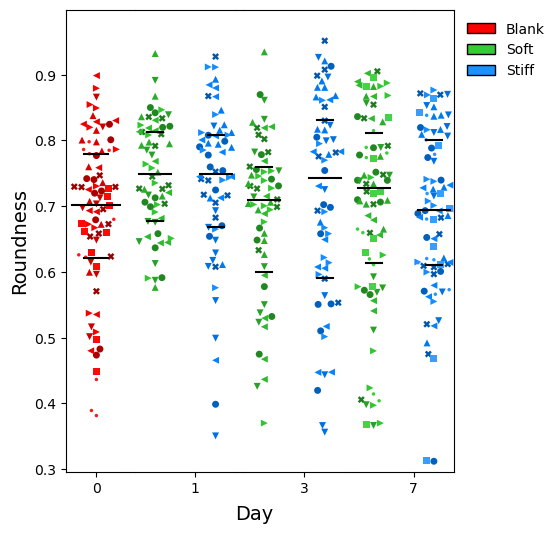

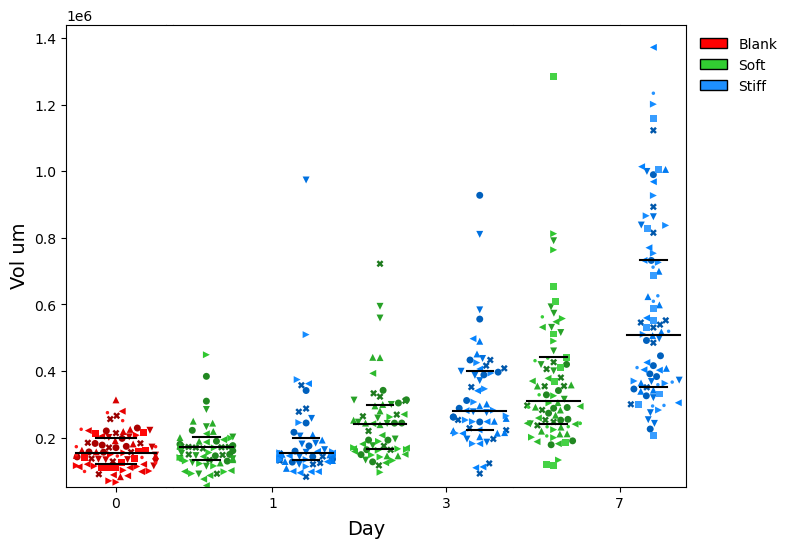

In [19]:
def plot_acinar_differences(data, parameter,color="k", spacing = 0.2, figsize=(5,6)):
    day_axis_dict ={0:0, 1:2, 3:5, 7:8}
    properties = dict(color=color)
    width_ratios=[1.5,spacing,1.5,1,spacing,1.5,1,spacing,1.5,1]
    gridspec = dict(hspace=0.0, wspace=0.01, width_ratios=width_ratios)
    fig, ax = plt.subplots(nrows = 1, ncols = len(width_ratios), figsize=figsize, gridspec_kw = gridspec)
    days = data["day"].unique()
    days.sort()

    for i, day in enumerate(data["day"].unique()):
        if day == 0:
            sns.swarmplot(data = data[data["day"]==day],  y=parameter, hue="Key_index", palette =palette_14_red, x="day",legend=None, ax = ax[0], size=5, alpha=1)
            sns.boxplot(data = data[data["day"]==day],  y=parameter, palette = "hsv", x="day", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[0], whis=0, fliersize=0, zorder=100)

        if day != 0:
            sns.swarmplot(data = data[(data["condition"]=="soft") & (data["day"]==day)],  y=parameter, x="day", hue="Key_index", legend=None,  palette = palette_14_limegreen,  ax = ax[day_axis_dict[day]], size=5, alpha=1)
            sns.boxplot(data = data[(data["condition"]=="soft") & (data["day"]==day)],  y=parameter, x="day", palette = "hsv", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[day_axis_dict[day]], whis=0, fliersize=0,zorder=100)
            
            sns.swarmplot(data = data[(data["condition"]=="stiff") & (data["day"]==day)],  y=parameter, x="day",hue="Key_index",  legend = None, palette = palette_14_dodgerblue, ax = ax[day_axis_dict[day]+1], size=5, alpha=1)

           # sns.swarmplot(data = data[(data["condition"]=="stiff") & (data["day"]==day)],  y=parameter, x="day",hue="Key_index",  legend = None, palette = "light:#32CD32", ax = ax[day_axis_dict[day]+1], size=5, alpha=1)
            sns.boxplot(data = data[(data["condition"]=="stiff") & (data["day"]==day)],  y=parameter, x="day",palette = "hsv", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[day_axis_dict[day]+1], whis=0, fliersize=0,zorder=100)

    for i, a in enumerate(ax):
        a.set_xlabel("")
        a.set_ylim(0.95*data[parameter].min(), 1.05*data[parameter].max())
        if i != 0 and i != len(ax)-1:
            a.spines["left"].set_visible(False)
            a.spines["right"].set_visible(False)
            a.yaxis.set_visible(False)
        if i == 0:
            a.spines["right"].set_visible(False)
        if i == len(ax)-1:
            a.spines["left"].set_visible(False)
            a.yaxis.set_visible(False)
        
    fig.text(0.5, 0.04, 'Day', va='center', ha='center', fontsize=14)

    legend_elements = [Patch(facecolor="red", edgecolor=colour,  label='Blank'),
                        Patch(facecolor="limegreen", edgecolor=colour,  label='Soft'),
                        Patch(facecolor="dodgerblue", edgecolor=colour,  label='Stiff')]
                    
    lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', handles=legend_elements, framealpha=0)
    ax[0].set_ylabel (ax[0].yaxis.get_label().get_text().replace("_", " "), fontsize=14)

    for i in ([0,2,3,5,6, 8, 9]):
        if i <= 3*len(days)-3:
            apply_markers(ax[i])
    for i in [1,3,4,6,7,9]:
        if i <= 3*len(days)-3:
            ax[i].set_xticks([])
    for i,j in enumerate([2,5,8]):
        if j < len(width_ratios)-1:
            ax[j].set_xticks([1], labels = days[i+1].astype(str))
    plt.savefig("Acinar{}.pdf".format(parameter), transparent = True, bbox_inches = "tight")


plot_acinar_differences(all_data[all_data["Key"]!="Lam_Pax, well1"], "Roundness")
plot_acinar_differences(all_data[all_data["Key"]!="Lam_Pax, well1"], "Vol_um", figsize=(8,6), spacing=0.1)

In [19]:
all_data.head()

,Unnamed: 0.1,Unnamed: 0,index,Vol_um,Roundness,filename,flag,well,day,condition,image_type,Protein_Set,Key,Key_index
0,0,0,0,357374.120063,0.607759,colbetacatd1stiffwell11p5zoom002lamgappostmigr...,NaN,1,1,stiff,"stiff, d1",Col_Beta_Cat,"Col_Beta_Cat, well1",0
1,1,1,0,277754.898776,0.717445,colbetacatd1stiffwell11p5zoom005migrating.tif,NaN,1,1,stiff,"stiff, d1",Col_Beta_Cat,"Col_Beta_Cat, well1",0
2,2,2,0,287270.187135,0.682551,colbetacatd1stiffwell11p6zoom001clearmigration...,NaN,1,1,stiff,"stiff, d1",Col_Beta_Cat,"Col_Beta_Cat, well1",0
3,3,3,0,119919.752203,0.927659,colbetacatd1stiffwell12p0zoom003.tif,NaN,1,1,stiff,"stiff, d1",Col_Beta_Cat,"Col_Beta_Cat, well1",0
4,4,4,0,123800.767690,0.705241,colbetacatd1stiffwell12p0zoom004lamgapfrommigr...,NaN,1,1,stiff,"stiff, d1",Col_Beta_Cat,"Col_Beta_Cat, well1",0


In [12]:
all_data.Key.unique()

array(['Col_Beta_Cat, well1', 'Col_Beta_Cat, well2', 'ECad_C3, well1',
       'ECad_C3, well2', 'Lam_Pax, well1', 'Lam_Pax, well2',
       'Misp_Alpha_Cat, well1', 'Misp_Alpha_Cat, well2',
       'Yap_Vinc, well1', 'Yap_Vinc, well2'], dtype=object)

In [14]:
all_data["mean_roundness"] = all_data.groupby(["Key", "day", "condition"], as_index=False).Roundness.transform('mean')
all_data["mean_volume"] = all_data.groupby(["Key", "day", "condition"], as_index = False).Vol_um.transform("mean")
print(all_data.shape)
all_data = all_data[all_data["Key"]!="Lam_Pax, well1"]
print(all_data.shape)

(620, 15)
(550, 15)


In [15]:
plotting = all_data[["Key", "day", "mean_roundness", "mean_volume", "condition"]]

In [16]:
plotting = plotting.drop_duplicates(subset='mean_roundness')

<Axes: xlabel='day', ylabel='mean_roundness'>

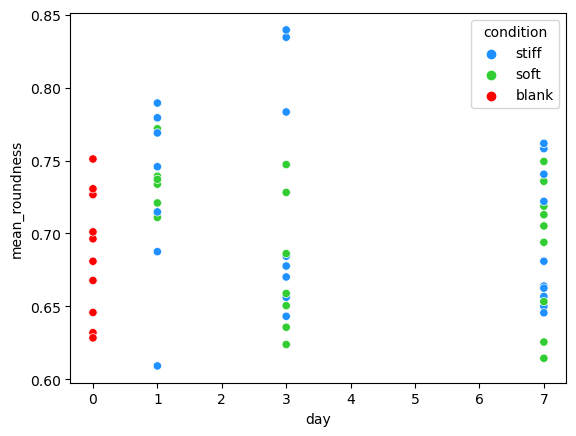

In [23]:
sns.scatterplot(data = plotting, x="day", y="mean_roundness", hue="condition", palette = ["dodgerblue", "limegreen", "red"])

<Axes: xlabel='day', ylabel='mean_volume'>

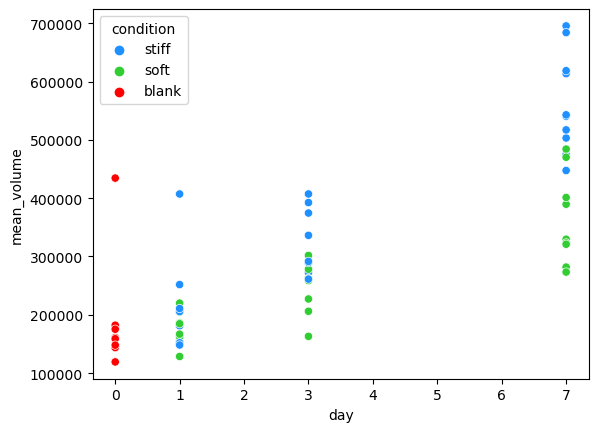

In [24]:
sns.scatterplot(data = plotting, x="day", y="mean_volume", hue="condition", palette = ["dodgerblue", "limegreen", "red"])

In [55]:
pd.merge(data, mean_roundness)

,Unnamed: 0,index,Vol_um,Image,Flag,Roundness,well,day,condition,protein,experiment
0,354,0,49276.259552,lampax_stiffd1_well2_1p5zoom_3.tif,False,0.607737,2,1,stiff,lampax_stiffd1_well2_1p5zoom_3.tif,lampax_stiffd1_well2_1p5zoom_3.tif stiff 1 2
1,355,0,135912.407763,lampax_stiffd1_well2_1p5zoom_5.tif,False,0.622006,2,1,stiff,lampax_stiffd1_well2_1p5zoom_5.tif,lampax_stiffd1_well2_1p5zoom_5.tif stiff 1 2
2,356,0,175588.337874,lampax_stiffd1_well2_1p5zoom_6.tif,False,0.720336,2,1,stiff,lampax_stiffd1_well2_1p5zoom_6.tif,lampax_stiffd1_well2_1p5zoom_6.tif stiff 1 2
3,395,0,222478.337267,lam_pax_d3_soft_well2_1p6zoom_8.tif,False,0.754832,2,3,soft,lam_pax,lam_pax soft 3 2
4,436,0,369051.648017,lam_pax_d7_soft_well1_1p4zoom_4.tif,False,0.804533,1,7,soft,lam_pax,lam_pax soft 7 1
5,521,0,554540.337320,new_misp_alphacat_soft_d1_well1_11.tif,False,0.877566,1,1,soft,new_misp_alphacat_soft,new_misp_alphacat_soft soft 1 1
